<a href="https://colab.research.google.com/github/Kreativepardha/datavisualization-movieDataSet/blob/main/Movie-data-visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: !pip install kagglehub[pandas-datasets]

!pip install kagglehub[pandas-datasets]


In [4]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load the dataset (Movies dataset under 1MB)
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "danielgrijalvas/movies",
    path="movies.csv"
)

# View data
df.head()

/tmp/ipython-input-4-2024674623.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 424k/424k [00:00<00:00, 105MB/s]

Extracting zip of movies.csv...


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


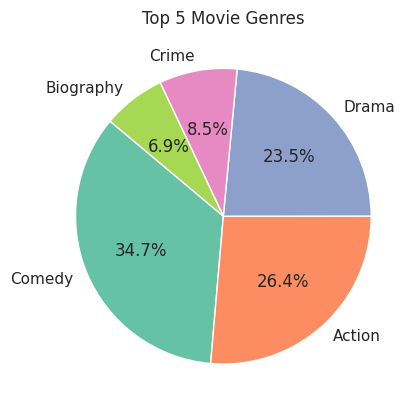

In [7]:
top_genres = df['genre'].value_counts().head(5)
top_genres.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Top 5 Movie Genres')
plt.ylabel('')
plt.show()


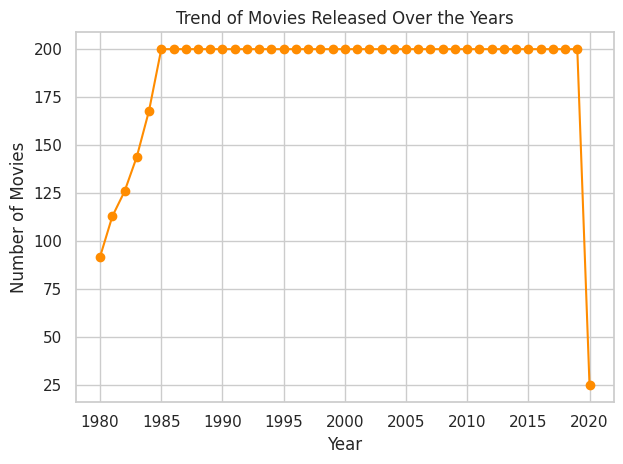

In [8]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
yearly_trend = df['year'].value_counts().sort_index()
yearly_trend.plot(kind='line', marker='o', color='darkorange')
plt.title('Trend of Movies Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()


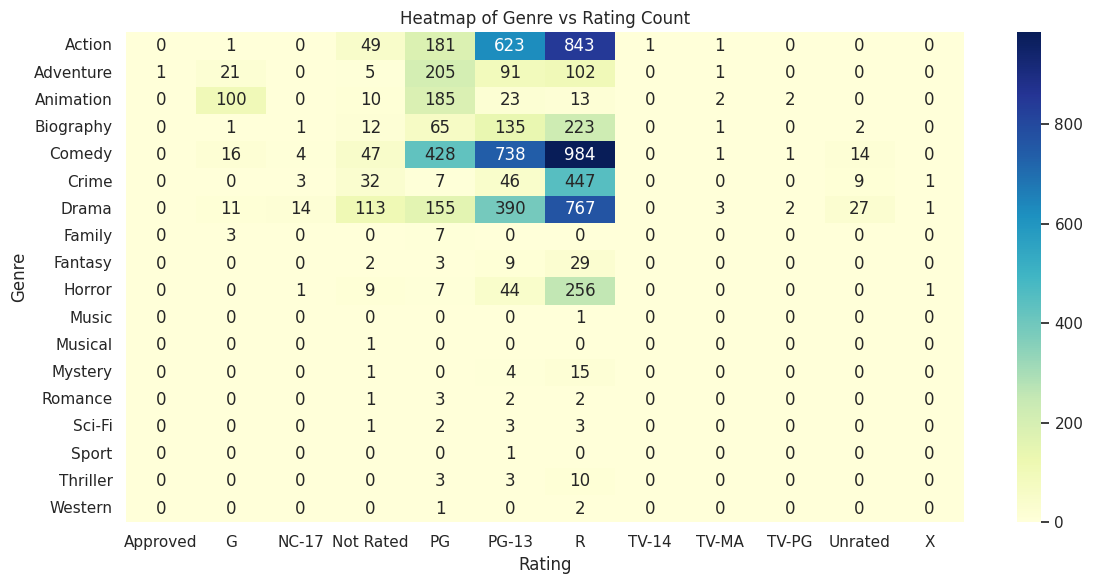

In [9]:
genre_rating = pd.crosstab(df['genre'], df['rating'])
plt.figure(figsize=(12, 6))
sns.heatmap(genre_rating, cmap="YlGnBu", annot=True, fmt='d')
plt.title('Heatmap of Genre vs Rating Count')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


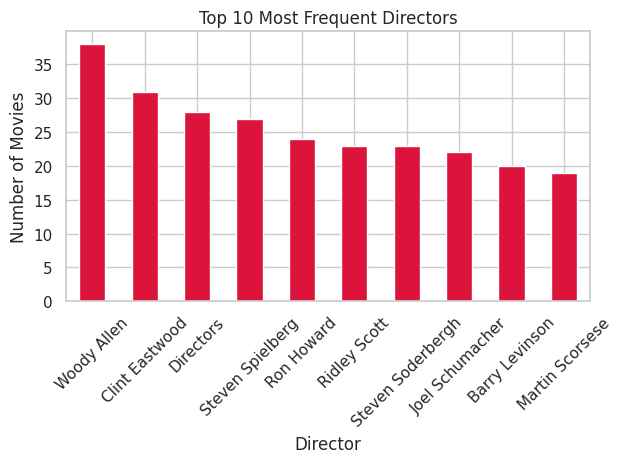

In [11]:
top_directors = df['director'].value_counts().head(10)
top_directors.plot(kind='bar', color='crimson')
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
